In [1]:
import ast
import pandas as pd

from collections import namedtuple

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.manifold import MDS
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, make_scorer, precision_score, recall_score, cohen_kappa_score, f1_score, matthews_corrcoef, log_loss, plot_confusion_matrix, roc_auc_score, plot_roc_curve
from sklearn.preprocessing import MinMaxScaler
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, GridSearchCV

import yellowbrick.model_selection as ybms

import sys
sys.path.append('../')
from utils.cv_helpers import *

In [2]:
with open('../her2-status_config.json', 'r') as f:
    config = ast.literal_eval(f.read())

In [3]:
cv_scheme = RepeatedStratifiedKFold(n_splits=config['FOLDS'], n_repeats=config['REPEATS'], random_state=config['SEED'])

scoring = {
    'Accuracy': make_scorer(accuracy_score),
    'Precision': make_scorer(precision_score),
    'Recall': make_scorer(recall_score),
    'Kappa': make_scorer(cohen_kappa_score),
    'MCC': make_scorer(matthews_corrcoef),
    'LL': make_scorer(log_loss),
    'F1': make_scorer(f1_score),
    'AUC': make_scorer(roc_auc_score)
}

class_weight = {1:7, 0:1}

In [12]:
X = pd.read_csv(config['TRAIN_DATA_FILE']).drop(['Tumour Average Depth', 'Normal Average Depth'], axis=1).set_index('sample_id')
y = pd.read_csv(config['Y_TRAIN_FILE']).set_index('sample_id').Class

## Comparison of classifiers without hyperparameters tuning

In [13]:
single_run_dt = estimator_cv_evaluation(X=X, 
                                        y=y, 
                                        estimator_name='DecisionTreeClassifier',
                                        estimator_object=DecisionTreeClassifier(),
                                        cv_scheme=cv_scheme,
                                        scoring=scoring
                                        )

single_run_rf = estimator_cv_evaluation(X=X, 
                                        y=y, 
                                        estimator_name='RandomForestClassfier',
                                        estimator_object=RandomForestClassifier(),
                                        cv_scheme=cv_scheme,
                                        scoring=scoring
                                        )

single_run_lr = estimator_cv_evaluation(X=X, 
                                        y=y, 
                                        estimator_name='LogisticRegression',
                                        estimator_object=Pipeline([('scaler', MinMaxScaler()), ('estimator', LogisticRegression(max_iter=10_000))]),
                                        cv_scheme=cv_scheme,
                                        scoring=scoring
                                        )

all_results = pd.concat([single_run_dt, single_run_rf, single_run_lr])

/opt/anaconda3/lib/python3.7/site-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


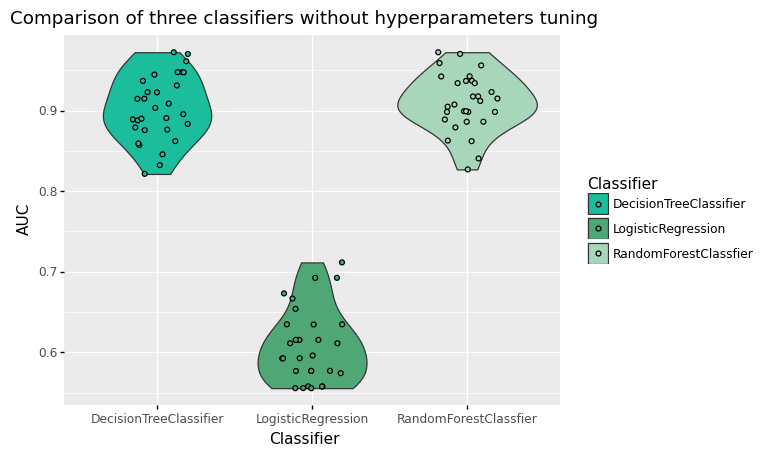

<ggplot: (8786759192185)>

In [15]:
plot_cv_estimators_comparison(all_results, 'AUC', rotation=0, palette=("#1cbd9c", "#4FA775", "#a7d6bb"), title='Comparison of three classifiers without hyperparameters tuning', jitter=0.2, hjust=0.5)

## Learning curves

dict_keys(['ax', 'cv', 'estimator', 'exploit_incremental_learning', 'groups', 'n_jobs', 'pre_dispatch', 'random_state', 'scoring', 'shuffle', 'train_sizes', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'splitter']) 


dict_keys(['ax', 'cv', 'estimator', 'exploit_incremental_learning', 'groups', 'n_jobs', 'pre_dispatch', 'random_state', 'scoring', 'shuffle', 'train_sizes', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'splitter']) 


dict_keys(['ax', 'cv', 'estimator', 'exploit_incremental_learning', 'groups', 'n_jobs', 'pre_dispatch', 'random_state', 'scoring', 'shuffle', 'train_sizes', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes'

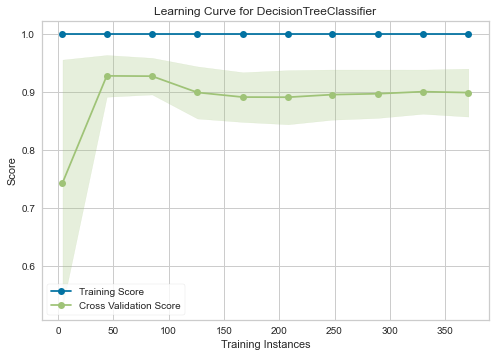

In [16]:
tmp = ybms.learning_curve(DecisionTreeClassifier(), X, y, cv=cv_scheme, train_sizes=np.arange(0.01, 1., 0.1), n_jobs=-1, scoring='roc_auc');

dict_keys(['ax', 'cv', 'estimator', 'exploit_incremental_learning', 'groups', 'n_jobs', 'pre_dispatch', 'random_state', 'scoring', 'shuffle', 'train_sizes', 'bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'oob_score', 'verbose', 'warm_start']) 


dict_keys(['ax', 'cv', 'estimator', 'exploit_incremental_learning', 'groups', 'n_jobs', 'pre_dispatch', 'random_state', 'scoring', 'shuffle', 'train_sizes', 'bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'oob_score', 'verbose', 'warm_start']) 


dict_keys(['ax', 'cv', 'estimator', 'exploit_incremental_learning', 'groups', 'n_jobs', 'pre_dispatch', 

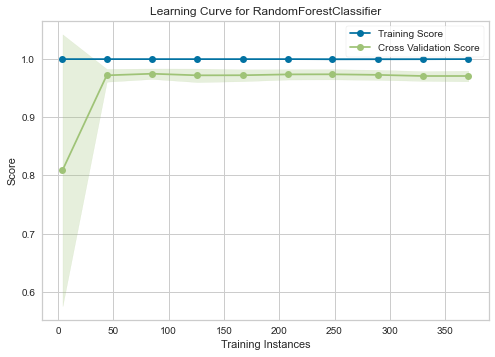

In [17]:
tmp = ybms.learning_curve(RandomForestClassifier(), X, y, cv=cv_scheme, train_sizes=np.arange(0.01, 1., 0.1), n_jobs=-1);

dict_keys(['ax', 'cv', 'estimator', 'exploit_incremental_learning', 'groups', 'n_jobs', 'pre_dispatch', 'random_state', 'scoring', 'shuffle', 'train_sizes', 'memory', 'steps', 'verbose', 'scaler', 'scaler__clip', 'scaler__copy', 'scaler__feature_range', 'estimator__C', 'estimator__class_weight', 'estimator__dual', 'estimator__fit_intercept', 'estimator__intercept_scaling', 'estimator__l1_ratio', 'estimator__max_iter', 'estimator__multi_class', 'estimator__n_jobs', 'estimator__penalty', 'estimator__random_state', 'estimator__solver', 'estimator__tol', 'estimator__verbose', 'estimator__warm_start']) 


dict_keys(['ax', 'cv', 'estimator', 'exploit_incremental_learning', 'groups', 'n_jobs', 'pre_dispatch', 'random_state', 'scoring', 'shuffle', 'train_sizes', 'memory', 'steps', 'verbose', 'scaler', 'scaler__clip', 'scaler__copy', 'scaler__feature_range', 'estimator__C', 'estimator__class_weight', 'estimator__dual', 'estimator__fit_intercept', 'estimator__intercept_scaling', 'estimator__l1_r

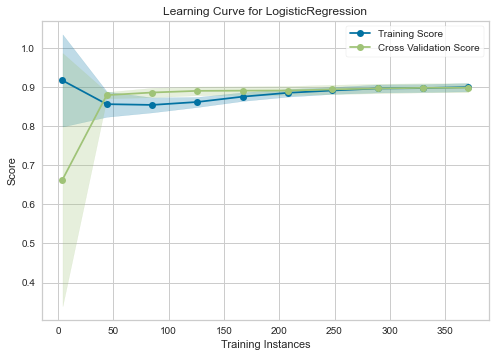

In [19]:
tmp = ybms.learning_curve(Pipeline([('scaler', MinMaxScaler()), ('estimator', LogisticRegression())]), X, y, cv=cv_scheme, train_sizes=np.arange(0.01, 1., 0.1), n_jobs=-1);

## Hyperparameters tuning

In [93]:
rf_search_space = [{
    'classifier': [RandomForestClassifier()],
    'classifier__max_depth': [1, 2, 4],
    'classifier__min_samples_split': [2, 4, 8, 16],
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__min_samples_leaf': [1, 2, 4, 8, 16],
    'classifier__bootstrap': [True, False],
    'classifier__class_weight': [None, 'balanced', 'balanced_subsample', class_weight],
    'classifier__ccp_alpha': [0, 0.01, 0.03, 0.05, 0.1, 0.3]
}]

dt_search_space = [{
    'classifier': [DecisionTreeClassifier()],
    'classifier__min_samples_split': [2, 4, 8, 16],
    'classifier__min_samples_leaf': [1, 2, 4, 8, 16],
    'classifier__class_weight': [None, 'balanced', 'balanced_subsample', class_weight],
    'classifier__ccp_alpha': [0, 0.01, 0.03, 0.1, 0.3],
    'classifier__max_depth': [1, 2, 4]
}]

lr_search_space = [{
    'classifier': [LogisticRegression()],
    'classifier__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'classifier__C': [0.01, 0.03, 0.1, 0.2, 0.4, 0.8],
    'classifier__class_weight': ['balanced', class_weight]
}]

In [95]:
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('classifier', None)
])

In [97]:
# grid_search_cv_rf = GridSearchCV(
#     estimator=pipeline,
#     param_grid=rf_search_space,
#     scoring=scoring,
#     n_jobs=-1,
#     refit='AUC',
#     cv=cv_scheme,
#     verbose=2,
#     return_train_score=True
# )

# grid_search_cv_dt = GridSearchCV(
#     estimator=pipeline,
#     param_grid=dt_search_space,
#     scoring=scoring,
#     n_jobs=-1,
#     refit='AUC',
#     cv=cv_scheme,
#     verbose=2,
#     return_train_score=True
# )

# grid_search_cv_lr = GridSearchCV(
#     estimator=pipeline,
#     param_grid=lr_search_space,
#     scoring=scoring,
#     n_jobs=-1,
#     refit='AUC',
#     cv=cv_scheme,
#     verbose=2,
#     return_train_score=True
# )

In [99]:
# grid_search_cv_rf.fit(X, y)
# grid_search_cv_dt.fit(X, y)
# grid_search_cv_lr.fit(X, y)

In [101]:
# cv_results_rf = show_cv_results(grid_search_cv_rf.cv_results_, ['Accuracy', 'Precision', 'Recall', 'AUC', 'F1', 'Kappa'])
# cv_results_dt = show_cv_results(grid_search_cv_dt.cv_results_, ['Accuracy', 'Precision', 'Recall', 'AUC', 'F1', 'Kappa'])
# cv_results_lr = show_cv_results(grid_search_cv_lr.cv_results_,['Accuracy', 'Precision', 'Recall', 'AUC', 'F1', 'Kappa'] )

In [103]:
# cv_results_rf

In [105]:
# cv_results_dt

In [107]:
# cv_results_lr

In [109]:
# print(grid_search_cv_rf.best_params_)
# print(grid_search_cv_dt.best_params_)
# print(grid_search_cv_lr.best_params_)


In [20]:
BestParams = namedtuple("BestParams", ["random_forest", "decision_tree", "logistic_regression"])
best_params = BestParams(
    RandomForestClassifier(ccp_alpha=0.1, class_weight='balanced_subsample', max_depth=1, min_samples_leaf=16, min_samples_split=16, bootstrap=True, criterion='gini'),
    DecisionTreeClassifier(ccp_alpha=0.01, class_weight='balanced', max_depth=1, min_samples_leaf=1, min_samples_split=2), 
    LogisticRegression(C=0.8, class_weight={0: 1, 1: 7}, solver='liblinear')
    )

## Comparison of three classifiers with hyperparameters tuning

In [21]:
single_evaluation_rf_tuned = estimator_cv_evaluation(X, y, 'RandomForestClassifier', best_params.random_forest, cv_scheme, scoring)
single_evaluation_dt_tuned = estimator_cv_evaluation(X, y, 'DecisionTreeClassifier', best_params.decision_tree, cv_scheme, scoring)
single_evaluation_lr_tuned = estimator_cv_evaluation(X, y, 'LogisticRegression', best_params.logistic_regression, cv_scheme, scoring)

results_tuned = pd.concat([single_evaluation_rf_tuned, single_evaluation_dt_tuned, single_evaluation_lr_tuned])

/opt/anaconda3/lib/python3.7/site-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):
/opt/anaconda3/lib/python3.7/site-packages/plotnine/stats/stat_boxplot.py:86: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(data['x']):


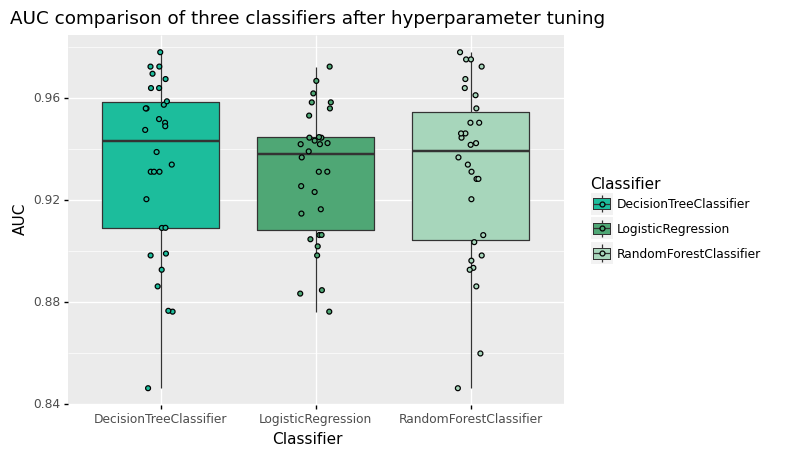

<ggplot: (8786760465657)>

In [24]:
p = plot_cv_estimators_comparison(results_tuned, 'AUC', rotation=0, hjust=0.5, title='AUC comparison of three classifiers after hyperparameter tuning', plot_type='box')
# p.save('../../reports/her2-status/auc_comparison_tuned.png')
p

/opt/anaconda3/lib/python3.7/site-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):
/opt/anaconda3/lib/python3.7/site-packages/plotnine/stats/stat_boxplot.py:86: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(data['x']):


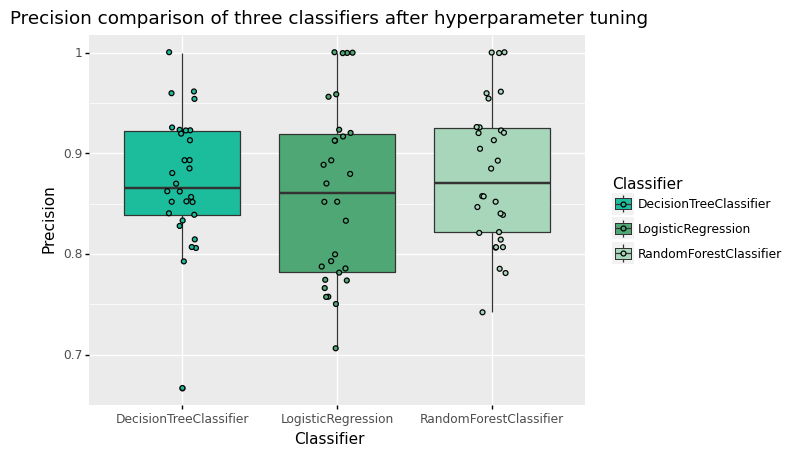

<ggplot: (8786759148717)>

In [27]:
p = plot_cv_estimators_comparison(results_tuned, 'Precision', rotation=0, hjust=0.5, title='Precision comparison of three classifiers after hyperparameter tuning', plot_type='box')
# p.save('../../reports/her2-status/accuracy_comparison_tuned.png')
p

## Comparison of DummyClassifier with other approaches

In [28]:
dummy_classifiers = {
    'stratified': DummyClassifier(strategy='stratified', random_state=config['SEED']),
    'most_frequent': DummyClassifier(strategy='most_frequent', random_state=config['SEED']),
    'uniform': DummyClassifier(strategy='uniform', random_state=config['SEED']),
    'constant1': DummyClassifier(strategy='constant', constant=1, random_state=config['SEED']),
    'constant0': DummyClassifier(strategy='constant', constant=0, random_state=config['SEED']),
}


In [29]:
dummy_1 = estimator_cv_evaluation(X=X, 
                                  y=y, 
                                  estimator_name='DummyStratified',
                                  estimator_object=dummy_classifiers['stratified'],
                                  cv_scheme=cv_scheme,
                                  scoring=scoring
                                  )

dummy_2 = estimator_cv_evaluation(X=X, 
                                  y=y, 
                                  estimator_name='DummyMostFrequent',
                                  estimator_object=dummy_classifiers['most_frequent'],
                                  cv_scheme=cv_scheme,
                                  scoring=scoring
                                  )

dummy_3 = estimator_cv_evaluation(X=X, 
                                  y=y, 
                                  estimator_name='DummyUniform',
                                  estimator_object=dummy_classifiers['uniform'],
                                  cv_scheme=cv_scheme,
                                  scoring=scoring
                                  )

dummy_4 = estimator_cv_evaluation(X=X, 
                                  y=y, 
                                  estimator_name='DummyConstant0',
                                  estimator_object=dummy_classifiers['constant1'],
                                  cv_scheme=cv_scheme,
                                  scoring=scoring
                                  )

dummy_5 = estimator_cv_evaluation(X=X, 
                                  y=y, 
                                  estimator_name='DummyConstatnt1',
                                  estimator_object=dummy_classifiers['constant0'],
                                  cv_scheme=cv_scheme,
                                  scoring=scoring
                                  )

single_ERBB2_copy_number = estimator_cv_evaluation(X=X[['ERBB2_copy_number']], 
                                                   y=y, 
                                                   estimator_name='Single feature: ERBB2 copy number',
                                                   estimator_object=best_params.decision_tree,
                                                   cv_scheme=cv_scheme,
                                                   scoring=scoring
                                                   )

single_ERBB2_CEP17_ratio = estimator_cv_evaluation(X=X[['ERBB2_CEP17_ratio']], 
                                                   y=y, 
                                                   estimator_name='Single feature: ERBB2/CEP17 ratio',
                                                   estimator_object=best_params.decision_tree,
                                                   cv_scheme=cv_scheme,
                                                   scoring=scoring
                                                   )

single_ERBB2_minus_ploidy = estimator_cv_evaluation(X=X[['ERBB2_minus_ploidy']], 
                                                    y=y, 
                                                    estimator_name='Single feature: ERBB2 minus ploidy',
                                                    estimator_object=best_params.decision_tree,
                                                    cv_scheme=cv_scheme,
                                                    scoring=scoring
                                                    )


all_features_classifier = estimator_cv_evaluation(X=X, 
                                                  y=y, 
                                                  estimator_name='All features',
                                                  estimator_object=best_params.decision_tree,
                                                  cv_scheme=cv_scheme,
                                                  scoring=scoring
                                                  )

all_classifiers = pd.concat([dummy_1, dummy_2, dummy_3, dummy_4, dummy_5, single_ERBB2_copy_number, single_ERBB2_CEP17_ratio, single_ERBB2_minus_ploidy, all_features_classifier])

only_wanted_classifiers = pd.concat([dummy_2, single_ERBB2_copy_number, single_ERBB2_CEP17_ratio, single_ERBB2_minus_ploidy, all_features_classifier])


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:870: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:870: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/opt/anaconda3/lib/python3.7/s

/opt/anaconda3/lib/python3.7/site-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):
/opt/anaconda3/lib/python3.7/site-packages/plotnine/stats/stat_boxplot.py:86: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(data['x']):


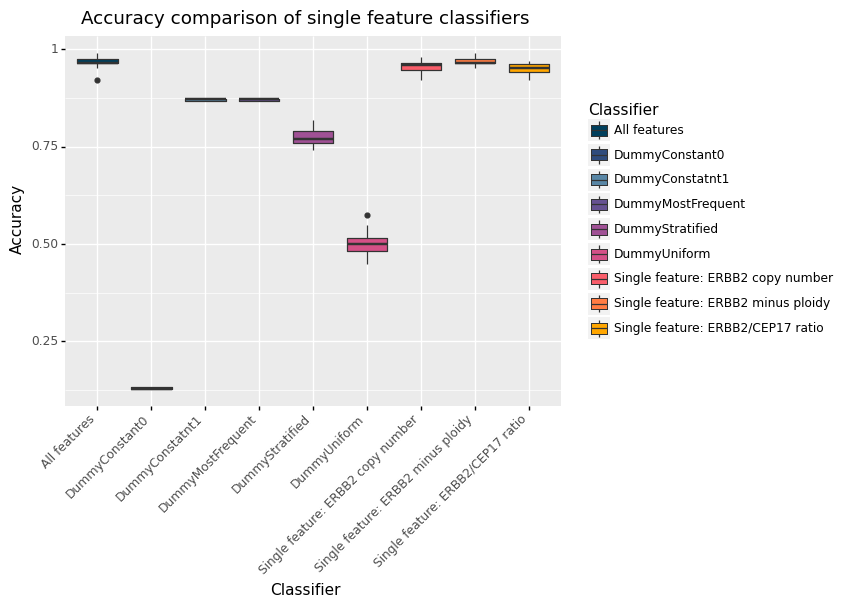

<ggplot: (8786759131573)>

In [30]:
palette = ['#003f5c', '#2f4b7c','#5886a5', '#665191', '#a05195', '#d45087', '#f95d6a', '#ff7c43', '#ffa600']
plot_cv_estimators_comparison(all_classifiers, 'Accuracy', rotation=45, hjust=1, jitter=0, title='Accuracy comparison of single feature classifiers', palette=palette, plot_type='box')

/opt/anaconda3/lib/python3.7/site-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):
/opt/anaconda3/lib/python3.7/site-packages/plotnine/stats/stat_boxplot.py:86: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(data['x']):


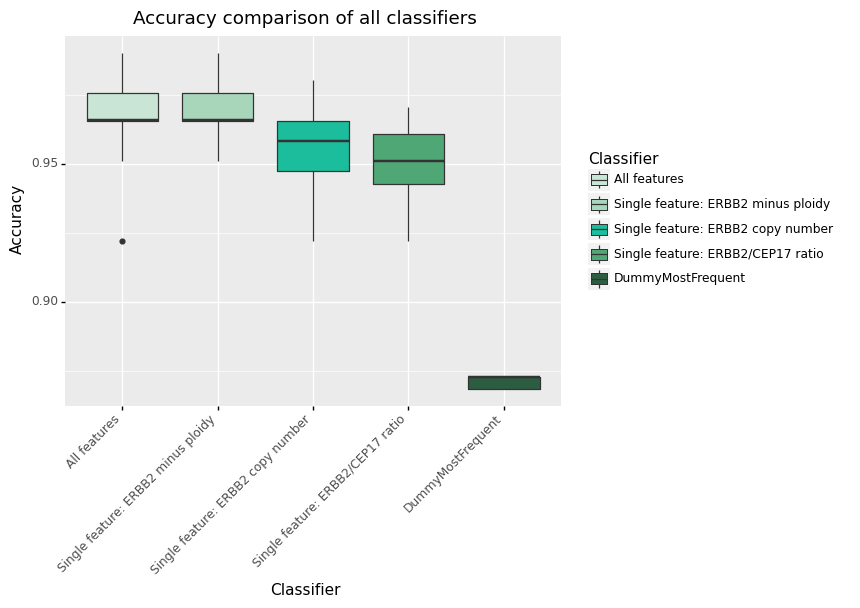

<ggplot: (8786760804053)>

In [32]:
palette = ["#C9E5D5", "#a7d6bb", "#1cbd9c", "#4FA775", "#2C5D41"]

only_wanted_classifiers['Classifier'] = pd.Categorical(only_wanted_classifiers['Classifier'], categories=['All features', 'Single feature: ERBB2 minus ploidy', 'Single feature: ERBB2 copy number', 'Single feature: ERBB2/CEP17 ratio', 'DummyMostFrequent'])

only_wanted_classifiers.Classifier.unique()
p = plot_cv_estimators_comparison(only_wanted_classifiers, 'Accuracy', rotation=45, hjust=1, jitter=0, title='Accuracy comparison of all classifiers', palette=palette, plot_type='box')
# p.save('../../reports/her2-status/accuracy_comparison.png')
p

## ROC curves

In [34]:
X_holdout = pd.read_csv(config['HOLDOUT_DATA_FILE']).set_index('sample_id')
X_holdout = X_holdout.drop(['Tumour Average Depth', 'Normal Average Depth'], axis=1)
y_holdout = pd.read_csv(config['Y_HOLDOUT_FILE']).set_index('sample_id').Class

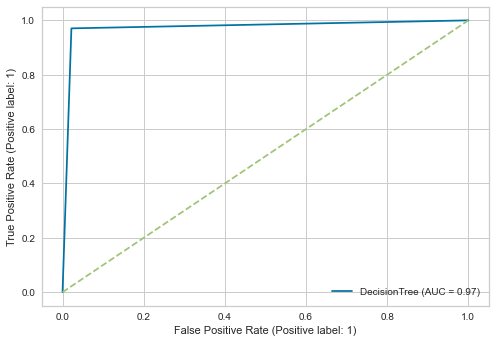

In [35]:
classifier = best_params.decision_tree
classifier.fit(X, y)
p = plot_roc_curve(classifier,
               X_holdout,
               y_holdout,
               name='DecisionTree')

p.ax_.plot([0, 1], [0, 1], '--')

[Text(223.2, 224.235, 'ERBB2_minus_ploidy <= 2.265\ngini = 0.5\nsamples = 613\nvalue = [306.5, 306.5]'),
 Text(111.6, 74.745, 'gini = 0.152\nsamples = 530\nvalue = [300.186, 27.158]'),
 Text(334.79999999999995, 74.745, 'gini = 0.043\nsamples = 83\nvalue = [6.314, 279.342]')]

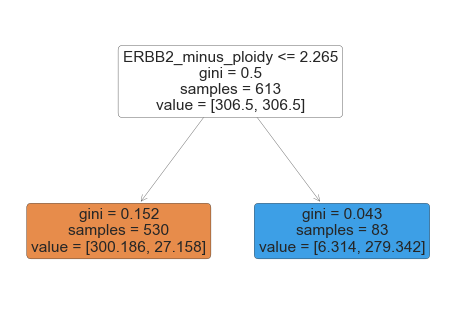

In [36]:
plot_tree(best_params.decision_tree.fit(X, y),
          feature_names=X.columns,
          filled=True,
          rounded=True,
          proportion=False
)

# DecisionTree with params tuned vs RandomForest without tuning

In [37]:
dt_params = estimator_cv_evaluation(X=X, 
                                    y=y, 
                                    estimator_name='DecisionTree',
                                    estimator_object=best_params.decision_tree,
                                    cv_scheme=cv_scheme,
                                    scoring=scoring
                                    )

rf_no_params = estimator_cv_evaluation(X=X, 
                                       y=y, 
                                       estimator_name='RandomForest',
                                       estimator_object=RandomForestClassifier(),
                                       cv_scheme=cv_scheme,
                                       scoring=scoring
                                       )

In [38]:
rf_vs_dt = pd.concat([dt_params, rf_no_params])

/opt/anaconda3/lib/python3.7/site-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):
/opt/anaconda3/lib/python3.7/site-packages/plotnine/stats/stat_boxplot.py:86: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(data['x']):


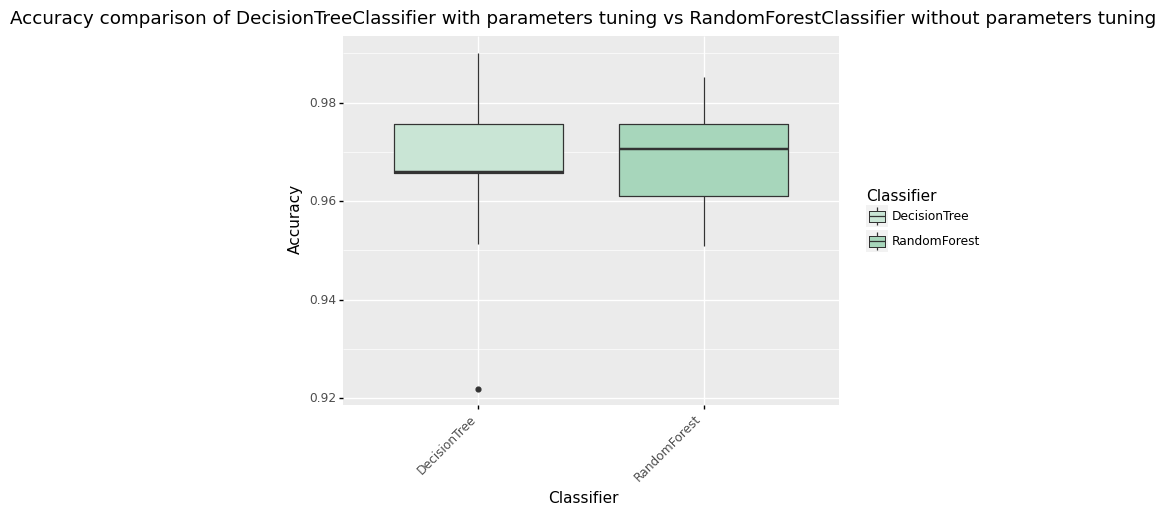

<ggplot: (8786762008185)>

In [40]:
plot_cv_estimators_comparison(rf_vs_dt, 'Accuracy', rotation=45, hjust=1, jitter=0, title='Accuracy comparison of DecisionTreeClassifier with parameters tuning vs RandomForestClassifier without parameters tuning', palette=palette, plot_type='box')

/opt/anaconda3/lib/python3.7/site-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):
/opt/anaconda3/lib/python3.7/site-packages/plotnine/stats/stat_boxplot.py:86: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(data['x']):


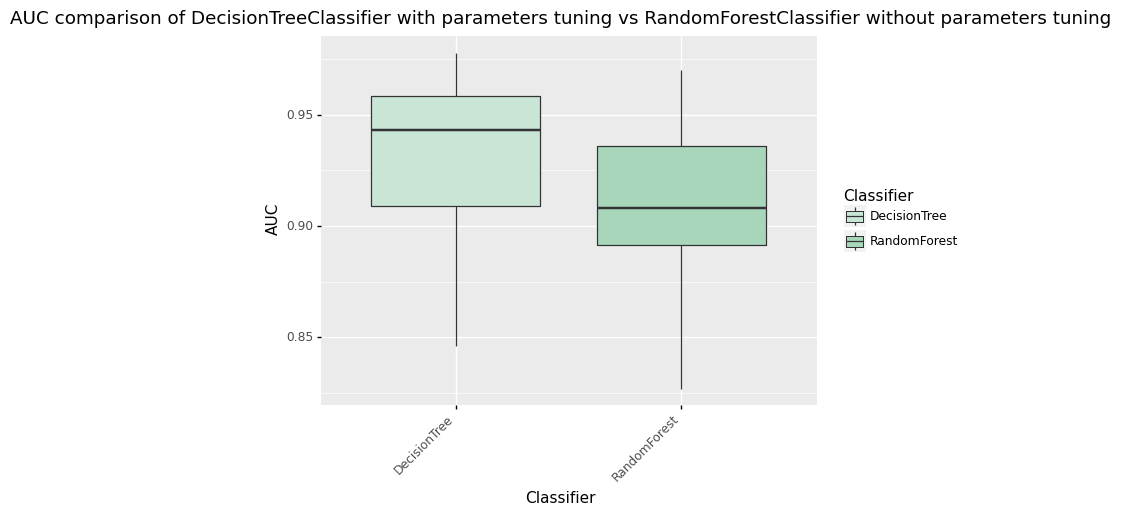

<ggplot: (8786759143165)>

In [41]:
plot_cv_estimators_comparison(rf_vs_dt, 'AUC', rotation=45, hjust=1, jitter=0, title='AUC comparison of DecisionTreeClassifier with parameters tuning vs RandomForestClassifier without parameters tuning', palette=palette, plot_type='box')